<a href="https://colab.research.google.com/github/taravskayavm/Mental_Health_Dataset/blob/main/taravskayavm_ml_homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ 5

Проведите разведочный анализ данных на датасете с kaggle.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.rcParams['axes.grid'] = True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TaravskayaVM_HomeWorks_Python_ML/Mental_Health_Dataset.csv')

About Dataset

This dataset records a global survey conducted to track trends in mental health. The data covers a range of variables such as levels of stress, depression, anxiety, subjective well-being, and use of mental health services. The survey involved respondents from various demographic backgrounds, including gender, employment status, and geographic region. This dataset aims to provide a better understanding of changes in mental health globally over the specified time period.

The studied characteristics of the respondents:

- Timestamp (Time and date of survey)
- Gender (Gender of the respondent)
- Country (The country where the respondent lives)
- Occupation (Occupation or profession of the respondent)
- self_employed (Is the respondent self-employed or not?)
- family_history (Is there a history of mental health disorders in the respondent's family?)
- treatment (Has the respondent ever received treatment or therapy for mental health problems?)
- Days_Indoors (Estimated number of days a week the respondent spends indoors)
- Growing_Stress (The current level of stress the respondent feels)
- Changes_Habits (Has the respondent experienced any changes in sleeping habits or patterns?)

In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
del df['Timestamp']

In [ ]:
df = df.rename(columns = str.lower)
df.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
df.isnull().sum()

gender                        0
country                       0
occupation                    0
self_employed              5202
family_history                0
treatment                     0
days_indoors                  0
growing_stress                0
changes_habits                0
mental_health_history         0
mood_swings                   0
coping_struggles              0
work_interest                 0
social_weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [ ]:
df = df.dropna(subset = 'self_employed')

In [ ]:
df.nunique()

gender                      2
country                    35
occupation                  5
self_employed               2
family_history              2
treatment                   2
days_indoors                5
growing_stress              3
changes_habits              3
mental_health_history       3
mood_swings                 3
coping_struggles            2
work_interest               3
social_weakness             3
mental_health_interview     3
care_options                3
dtype: int64

In [ ]:
df["country"].unique()

array(['United States', 'Poland', 'Australia', 'Canada', 'United Kingdom',
       'South Africa', 'Sweden', 'New Zealand', 'Netherlands', 'India',
       'Belgium', 'Ireland', 'France', 'Portugal', 'Brazil', 'Costa Rica',
       'Russia', 'Germany', 'Switzerland', 'Finland', 'Israel', 'Italy',
       'Bosnia and Herzegovina', 'Singapore', 'Nigeria', 'Croatia',
       'Thailand', 'Denmark', 'Mexico', 'Greece', 'Moldova', 'Colombia',
       'Georgia', 'Czech Republic', 'Philippines'], dtype=object)

In [ ]:
df['country'].value_counts()

country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

In [ ]:
df['country'].value_counts(normalize=True)

country
United States             0.585231
United Kingdom            0.176291
Canada                    0.061136
Australia                 0.020985
Netherlands               0.020525
Ireland                   0.019320
Germany                   0.016297
Sweden                    0.009813
India                     0.009660
France                    0.008149
Brazil                    0.008149
New Zealand               0.006944
South Africa              0.006944
Switzerland               0.005432
Israel                    0.005432
Italy                     0.005432
Belgium                   0.002869
Poland                    0.002869
Russia                    0.002716
Denmark                   0.002716
Singapore                 0.002716
Greece                    0.002716
Czech Republic            0.001358
Georgia                   0.001358
Colombia                  0.001358
Moldova                   0.001358
Mexico                    0.001358
Croatia                   0.001358
Thailand    

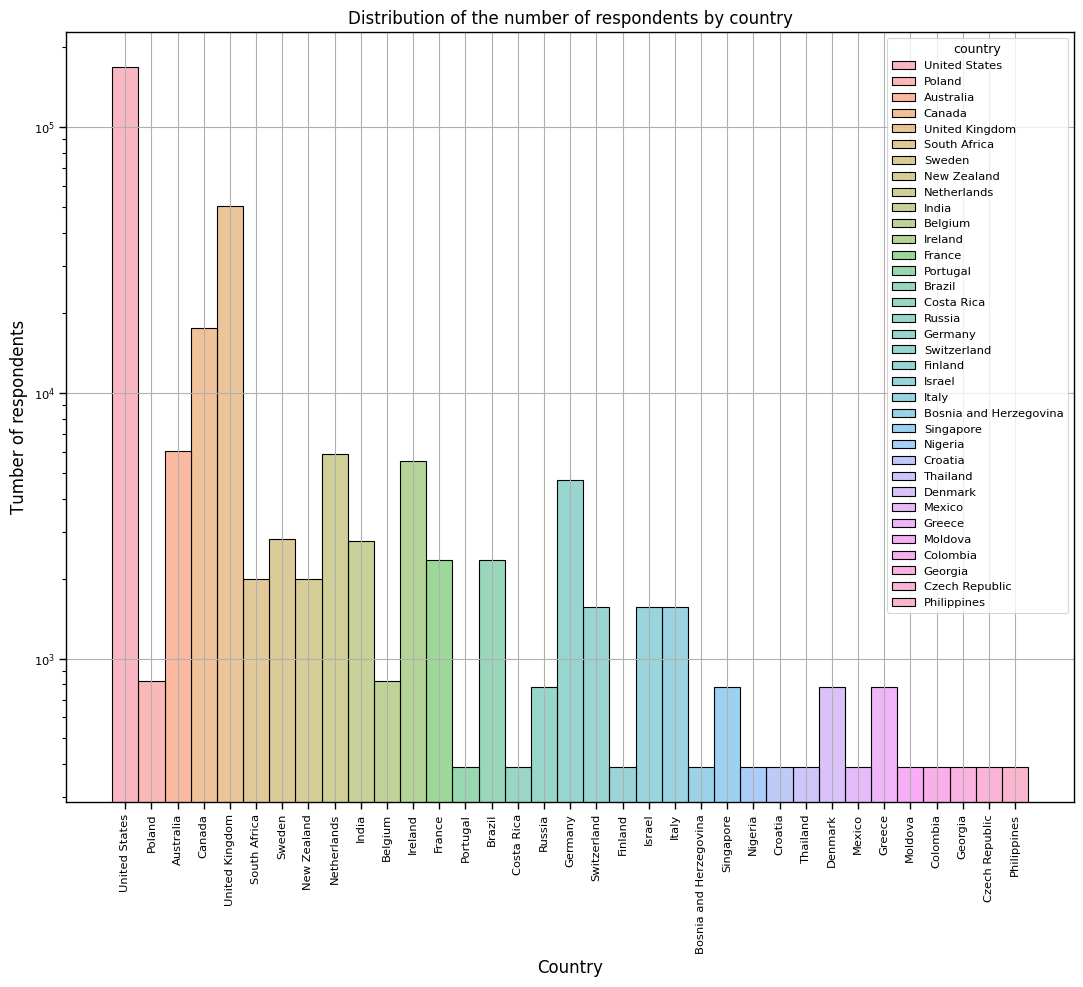

In [ ]:
plt.figure(figsize=(13, 10))
sns.set_context("paper", font_scale=0.94)

sns.histplot(
    data=df,
    x='country',
    bins=10,
    hue='country'
)

plt.title('Distribution of the number of respondents by country', fontsize=12)
plt.ylabel('Тumber of respondents', fontsize=12)
plt.xlabel('Country', fontsize=12)
# plt.legend().remove()

bins=10
plt.xticks(rotation=90)

plt.yscale('log')


In [ ]:
df["growing_stress"].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [ ]:
df['growing_stress'].value_counts()

growing_stress
Maybe    98225
Yes      97854
No       91083
Name: count, dtype: int64

In [ ]:
df['growing_stress'].value_counts(normalize=True)

growing_stress
Maybe    0.342054
Yes      0.340762
No       0.317183
Name: proportion, dtype: float64

In [ ]:
df["mood_swings"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [ ]:
df['mood_swings'].value_counts()

mood_swings
Medium    99272
Low       98062
High      89828
Name: count, dtype: int64

In [ ]:
df['mood_swings'].value_counts(normalize=True)

mood_swings
Medium    0.345700
Low       0.341487
High      0.312813
Name: proportion, dtype: float64

In [ ]:
df["treatment"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['treatment'].value_counts()

treatment
Yes    144744
No     142418
Name: count, dtype: int64

In [ ]:
df['treatment'].value_counts(normalize=True)

treatment
Yes    0.50405
No     0.49595
Name: proportion, dtype: float64

In [ ]:
df['occupation'].unique()

array(['Corporate', 'Student', 'Business', 'Housewife', 'Others'],
      dtype=object)

In [ ]:
df['occupation'].value_counts()

occupation
Housewife    65173
Student      60687
Corporate    60157
Others       51893
Business     49252
Name: count, dtype: int64

In [ ]:
df['occupation'].value_counts(normalize=True)

occupation
Housewife    0.226956
Student      0.211334
Corporate    0.209488
Others       0.180710
Business     0.171513
Name: proportion, dtype: float64

In [ ]:
df['gender'].value_counts()

gender
Male      235950
Female     51212
Name: count, dtype: int64

In [ ]:
df['gender'].value_counts(normalize=True)

gender
Male      0.821662
Female    0.178338
Name: proportion, dtype: float64

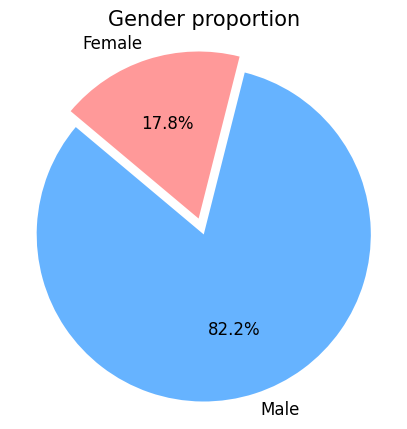

In [ ]:
labels = ['Male', 'Female']
sizes = [0.821662, 0.178338]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Выделение сегмента для "No"

# Построение круговой диаграммы
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.axis('equal')  # Позволяет создать круговую диаграмму в виде круга
plt.title('Gender proportion', fontsize=15);

In [ ]:
df['treatment'].value_counts()

treatment
Yes    144744
No     142418
Name: count, dtype: int64

In [ ]:
df['treatment'].value_counts(normalize=True)

treatment
Yes    0.50405
No     0.49595
Name: proportion, dtype: float64

In [ ]:
df['self_employed'].value_counts()

self_employed
No     257994
Yes     29168
Name: count, dtype: int64

In [ ]:
df['self_employed'].value_counts(normalize=True)

self_employed
No     0.898427
Yes    0.101573
Name: proportion, dtype: float64

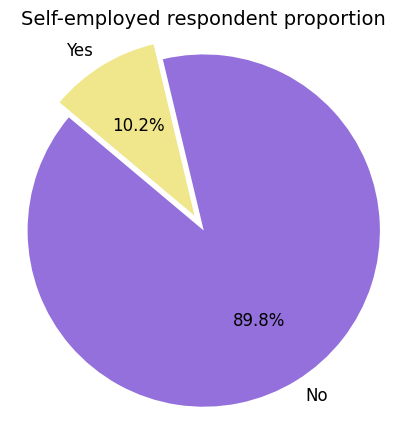

In [ ]:
labels = ['No', 'Yes']
sizes = [0.898427, 0.101573]
colors = ['#9370DB', '#F0E68C']  # Цвета для каждой категории
explode = (0.1, 0)  # Выделение сегмента для "No"

# Построение круговой диаграммы
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.axis('equal')  # Позволяет создать круговую диаграмму в виде круга
plt.title('Self-employed respondent proportion', fontsize=14);

In [ ]:
# Группировка (сегментация) и подсчет количества ответов по переменной growing_stress и country
stress_by_country = df.groupby(['growing_stress', 'country']).size().unstack()

# Группировка и подсчет количества ответов по переменной growing_stress и gender
stress_by_gender = df.groupby(['growing_stress', 'gender']).size().unstack()

# Группировка и подсчет количества ответов по переменной growing_stress и occupation
stress_by_occupation = df.groupby(['growing_stress', 'occupation']).size().unstack()

# Группировка и подсчет количества ответов по переменной growing_stress и self_employed
stress_by_self_employed = df.groupby(['growing_stress', 'self_employed']).size().unstack()

# Группировка и подсчет количества ответов по переменной mood_swings и treatment
mood_by_treatment = df.groupby(['mood_swings', 'treatment']).size().unstack()

# Группировка и подсчет количества ответов по переменной growing_stress и treatment
growing_stress_by_treatment = df.groupby(['growing_stress', 'treatment']).size().unstack()

In [ ]:
stress_by_country

country,Australia,Belgium,Bosnia and Herzegovina,Brazil,Canada,Colombia,Costa Rica,Croatia,Czech Republic,Denmark,...,Poland,Portugal,Russia,Singapore,South Africa,Sweden,Switzerland,Thailand,United Kingdom,United States
growing_stress,,,,,,,,,,,,,,,,,,,,,
Maybe,2027,267,137,822,5965,137,137,137,137,274,...,267,137,274,274,678,945,548,137,17424,57261
No,1899,256,125,750,5554,125,125,125,125,250,...,256,125,250,250,631,887,500,125,16096,53224
Yes,2100,301,128,768,6037,128,128,128,128,256,...,301,128,256,256,685,986,512,128,17104,57571


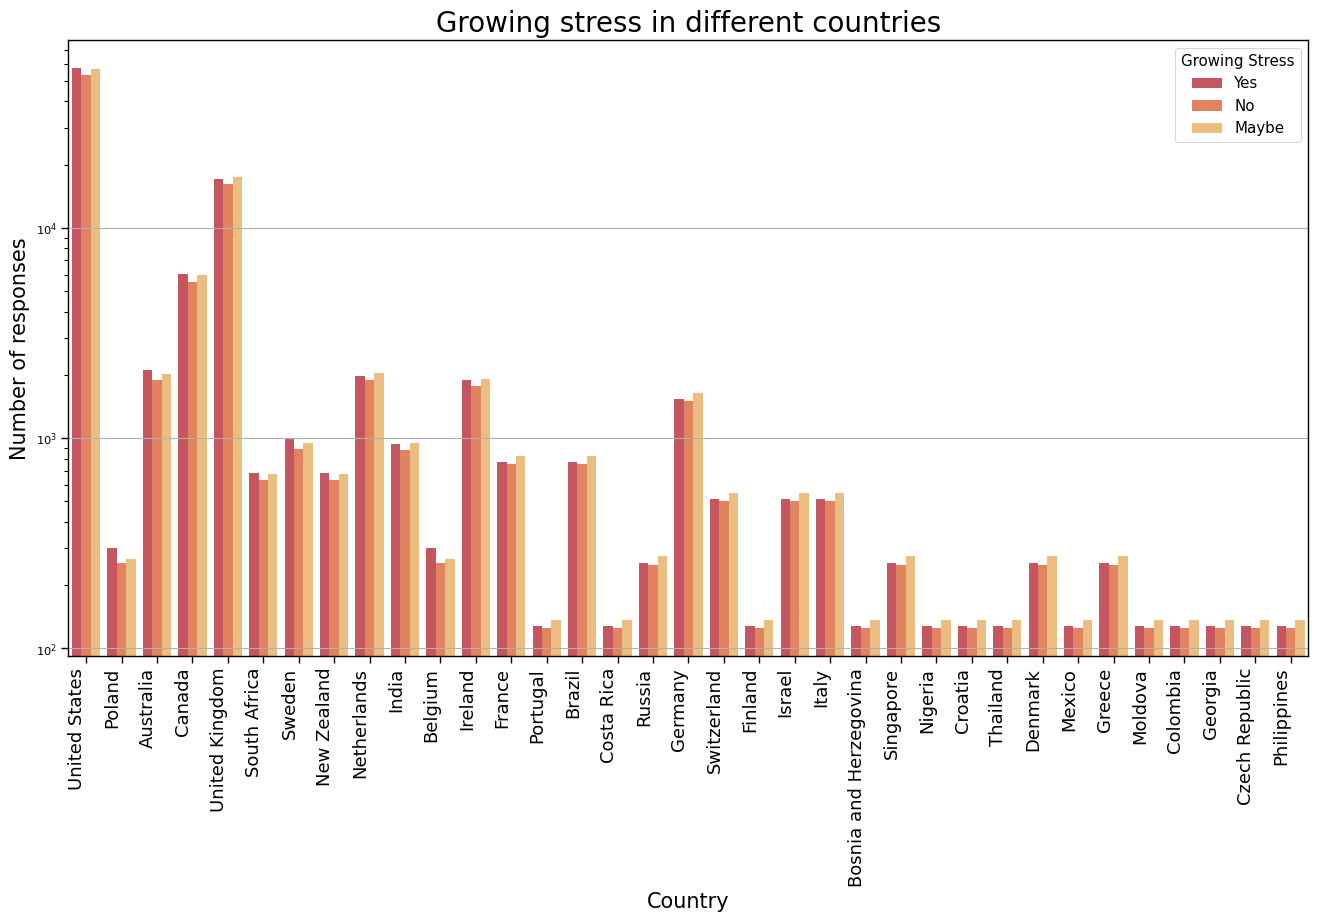

In [ ]:
plt.figure(figsize=(16, 8))
colors = sns.color_palette("Spectral", 8)

sns.countplot(data=df,
              x='country',
              hue='growing_stress',
              palette=colors)

plt.title('Growing stress in different countries', fontsize=20)
plt.ylabel('Number of responses', fontsize=15)
plt.xlabel('Country', fontsize=15)

bins=25
plt.xticks(rotation=90, ha='right', fontsize=13)
plt.legend(title='Growing Stress', title_fontsize='large', fontsize='large')
plt.yscale('log')

In [ ]:
stress_by_gender

gender,Female,Male
growing_stress,,
Maybe,15340,82885
No,15458,75625
Yes,20414,77440


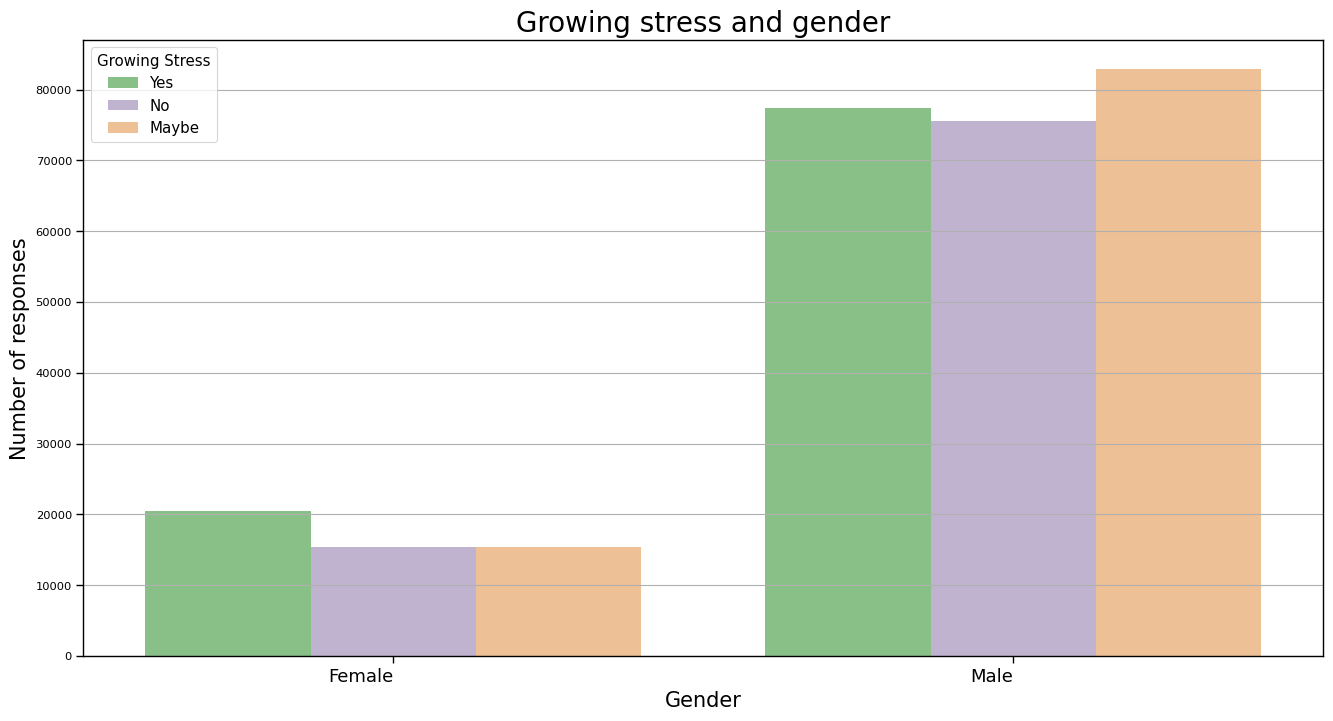

In [ ]:
plt.figure(figsize=(16, 8))
colors = sns.color_palette("Accent", 8)

sns.countplot(data=df,
              x='gender',
              hue='growing_stress',
              palette=colors)

plt.title('Growing stress and gender', fontsize=20)
plt.ylabel('Number of responses', fontsize=15)
plt.xlabel('Gender', fontsize=15)

bins=15
plt.xticks(ha='right', fontsize=13)
plt.legend(title='Growing Stress', title_fontsize='large', fontsize='large');

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# Создаем таблицу сопряженности для женщин и ответов
female_data = df[df['gender'] == 'Female']
female_yes_count = female_data[female_data['growing_stress'] == 'Yes'].shape[0]
female_total_count = female_data.shape[0]

# Общее количество ответов "нет" или "возможно"
female_no_maybe_count = female_total_count - female_yes_count

# Общее количество ответов "да" и "нет" или "возможно"
count = np.array([female_yes_count, female_no_maybe_count])

# Общее количество ответов для всех женщин
nobs = np.array([female_total_count, female_total_count])

# Выполняем Z-тест
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')  # 'larger' для одностороннего теста

# Выводим результаты
print("Z-статистика:", z_stat)
print("p-значение:", p_value)

Z-статистика: -64.89239586788776
p-значение: 1.0


In [ ]:
stress_by_occupation

occupation,Business,Corporate,Housewife,Others,Student
growing_stress,,,,,
Maybe,16747,16747,23741,18075,22915
No,13958,19905,22192,18680,16348
Yes,18547,23505,19240,15138,21424


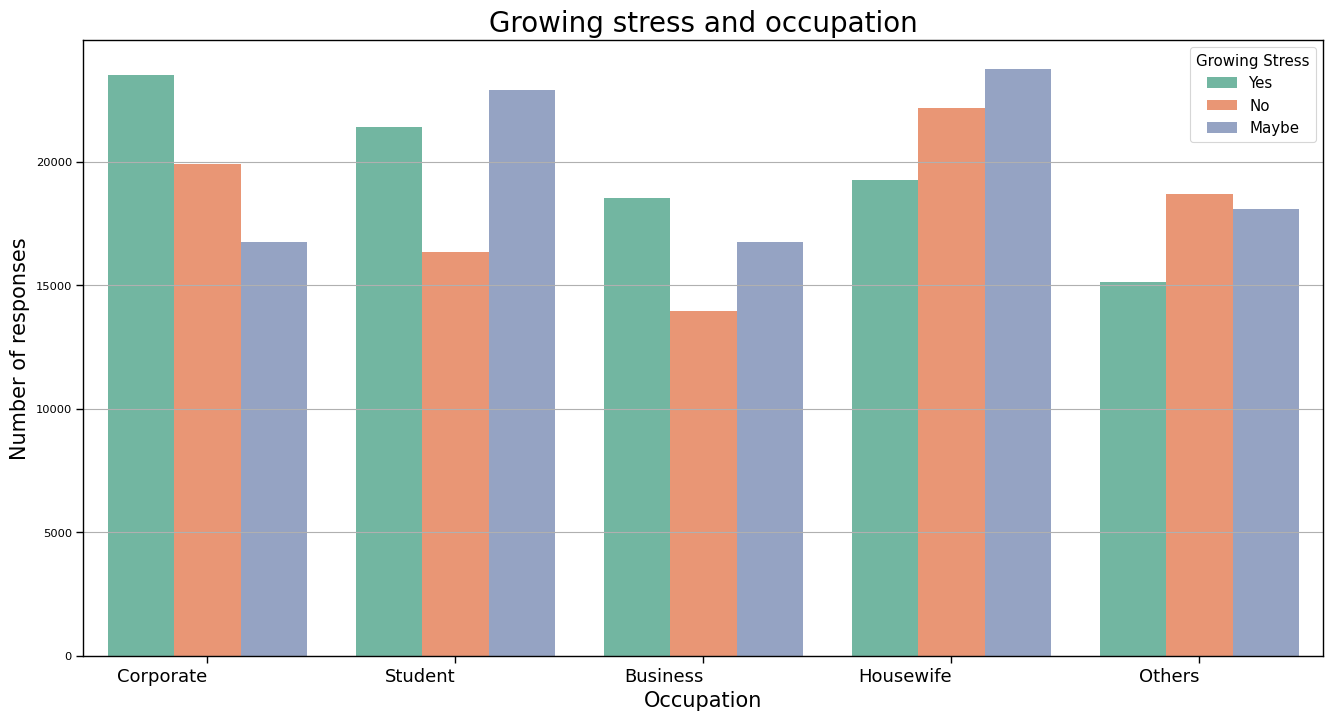

In [ ]:
plt.figure(figsize=(16, 8))
colors = sns.color_palette("Set2", 8)

sns.countplot(data=df,
              x='occupation',
              hue='growing_stress',
              palette=colors)

plt.title('Growing stress and occupation', fontsize=20)
plt.ylabel('Number of responses', fontsize=15)
plt.xlabel('Occupation', fontsize=15)

bins=25
plt.xticks(ha='right', fontsize=13)
plt.legend(title='Growing Stress', title_fontsize='large', fontsize='large');

In [ ]:
stress_by_self_employed

self_employed,No,Yes
growing_stress,,
Maybe,88136,10089
No,81791,9292
Yes,88067,9787


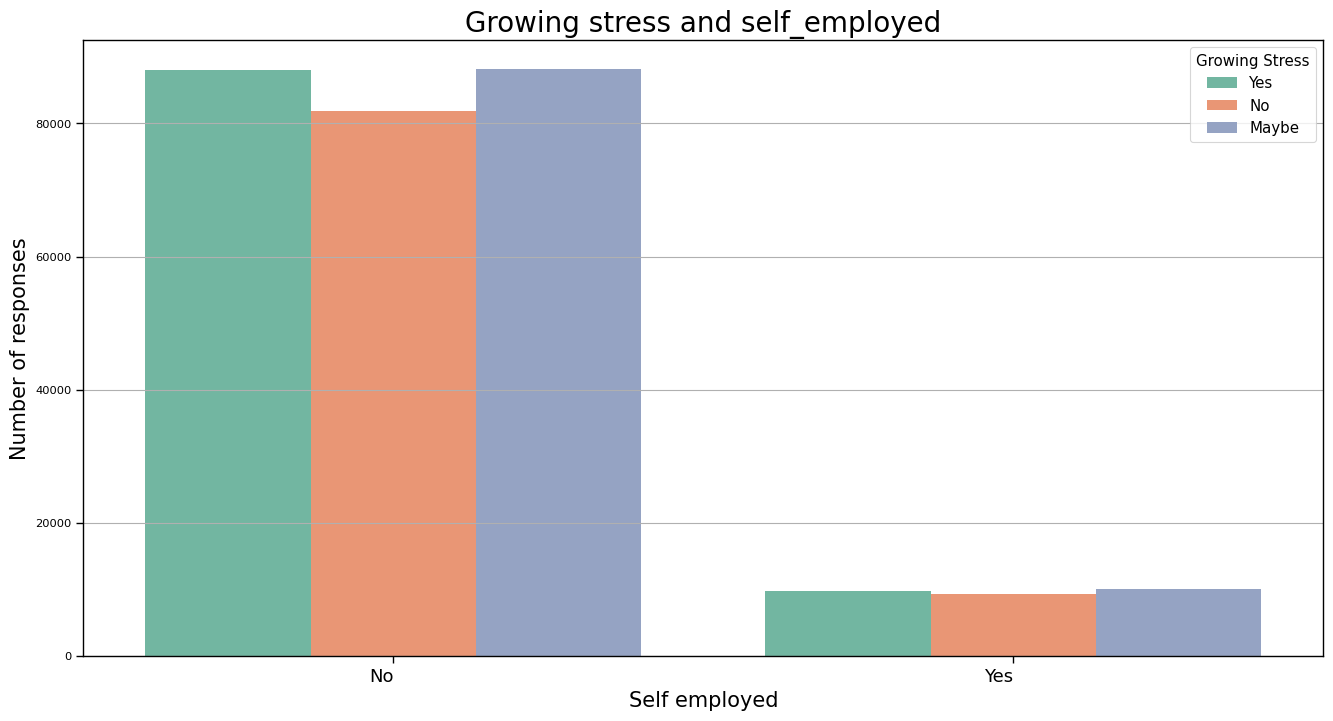

In [ ]:
plt.figure(figsize=(16, 8))
colors = sns.color_palette("Set2", 8)

sns.countplot(data=df,
              x='self_employed',
              hue='growing_stress',
              palette=colors)

plt.title('Growing stress and self_employed', fontsize=20)
plt.ylabel('Number of responses', fontsize=15)
plt.xlabel('Self employed', fontsize=15)

bins=25
plt.xticks(ha='right', fontsize=13)
plt.legend(title='Growing Stress', title_fontsize='large', fontsize='large');


In [ ]:
mood_by_treatment

treatment,No,Yes
mood_swings,,
High,44282,45546
Low,48744,49318
Medium,49392,49880


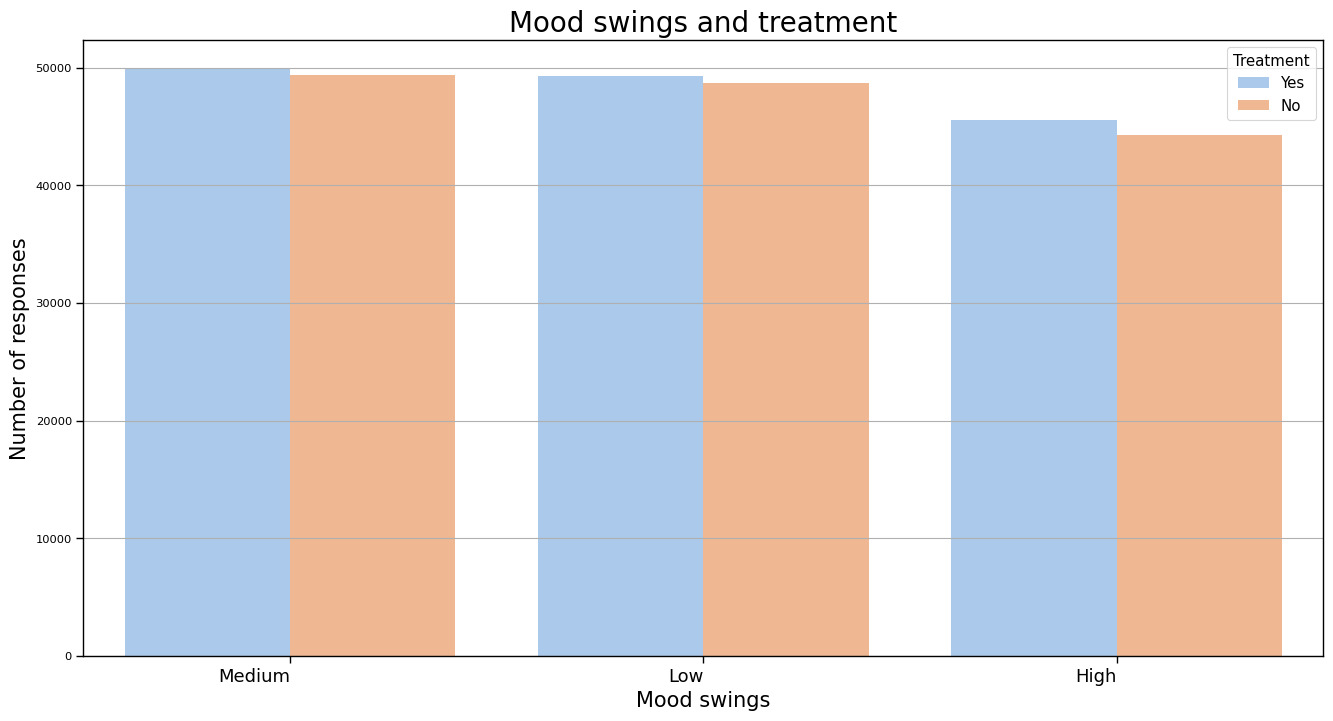

In [ ]:
plt.figure(figsize=(16, 8))
colors = sns.color_palette("pastel", 8)

sns.countplot(data=df,
              x='mood_swings',
              hue='treatment',
              palette=colors)

plt.title('Mood swings and treatment', fontsize=20)
plt.ylabel('Number of responses', fontsize=15)
plt.xlabel('Mood swings', fontsize=15)

bins=25
plt.xticks(ha='right', fontsize=13)
plt.legend(title='Treatment', title_fontsize='large', fontsize='large');

In [ ]:
growing_stress_by_treatment

treatment,No,Yes
growing_stress,,
Maybe,49198,49027
No,45347,45736
Yes,47873,49981


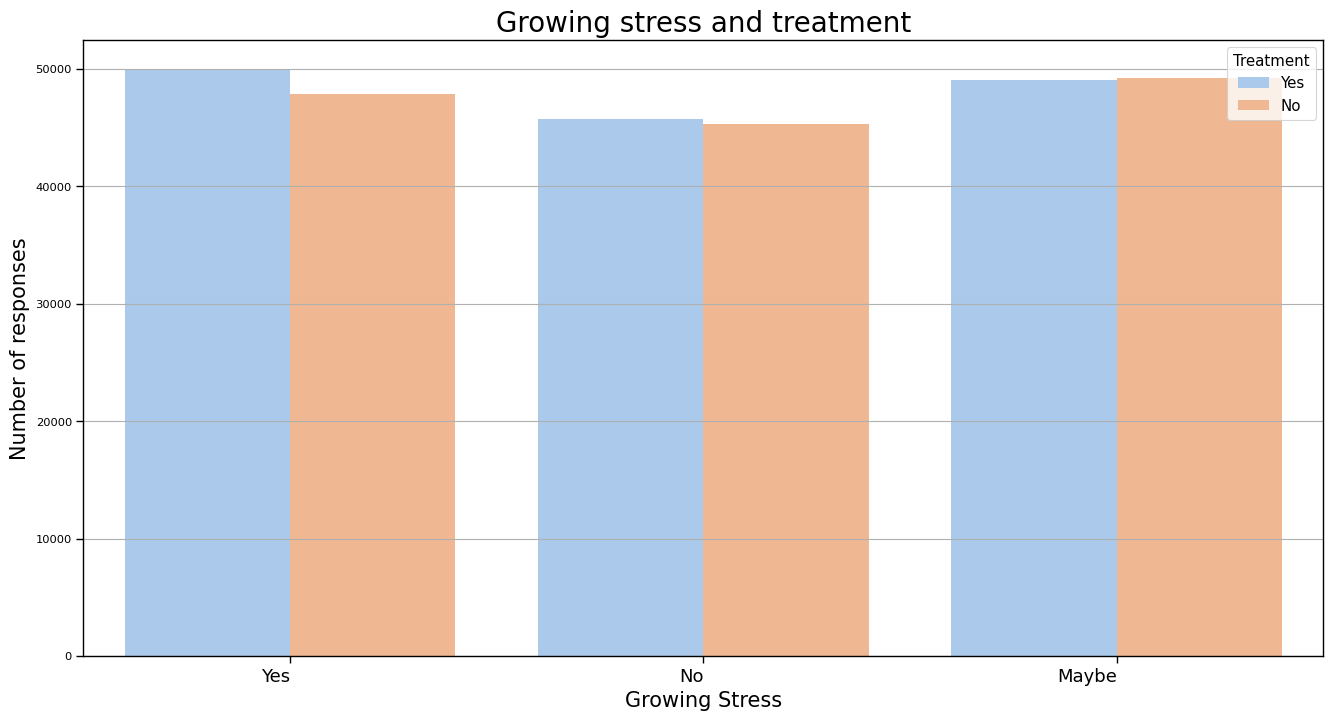

In [ ]:
plt.figure(figsize=(16, 8))
colors = sns.color_palette("pastel")

sns.countplot(data=df,
              x='growing_stress',
              hue='treatment',
              palette=colors)

plt.title('Growing stress and treatment', fontsize=20)
plt.ylabel('Number of responses', fontsize=15)
plt.xlabel('Growing Stress', fontsize=15)

bins=25
plt.xticks(ha='right', fontsize=13)
plt.legend(title='Treatment', title_fontsize='large', fontsize='large');